In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Model_Data_V3.csv")

### In this section of data visualization, we ignore the observations of more than 50 days of stay in the hospital

In [3]:
data = data[data.TOTAL_LOS <= 50]

## Overview of LOS Distribution

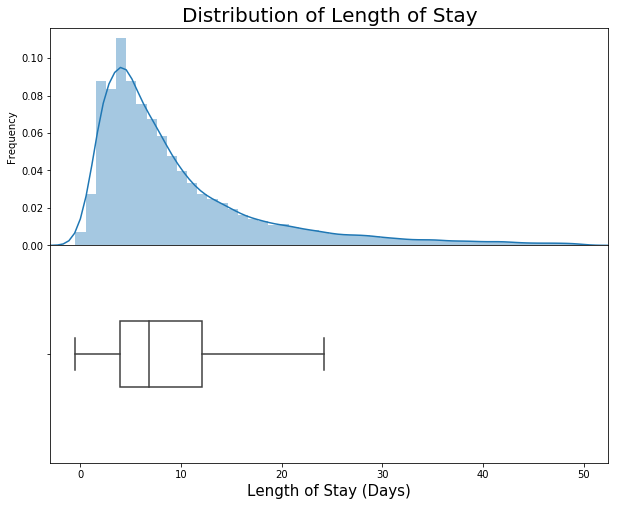

In [4]:
fig, axs = plt.subplots(nrows=2, figsize = (10, 8))

sns.distplot(
    data['TOTAL_LOS'], 
    ax=axs[0]
).set_title('Distribution of Length of Stay', size=20)

sns.boxplot(
    data['TOTAL_LOS'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
).set_xlabel('Length of Stay (Days)', size=15)

# Align axes
spacer = np.max(data['TOTAL_LOS']) * 0.05
xmin = np.min(data['TOTAL_LOS']) - spacer
xmax = np.max(data['TOTAL_LOS']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

axs[0].set(ylabel='Frequency')

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

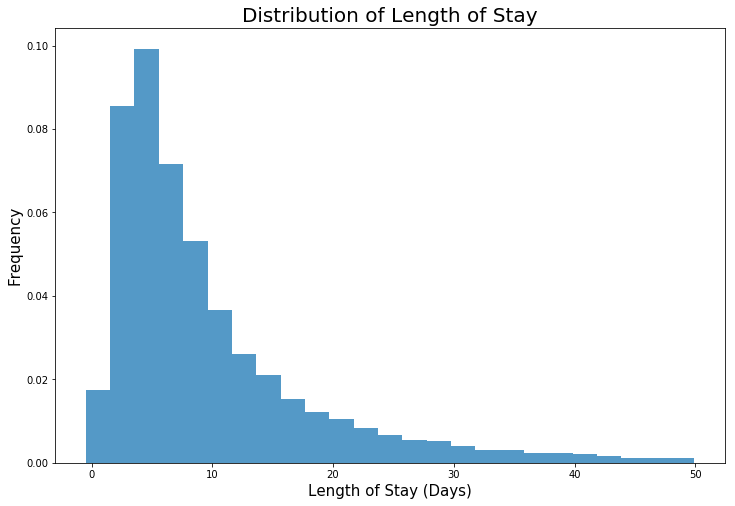

In [5]:
# In case people find this one to be more clear
plt.figure(figsize = (12,8))
plt.hist(data.TOTAL_LOS, bins=25, density=True, color='#5499C7')
plt.title('Distribution of Length of Stay', size=20)
plt.xlabel('Length of Stay (Days)', size=15)
plt.ylabel('Frequency', size=15);

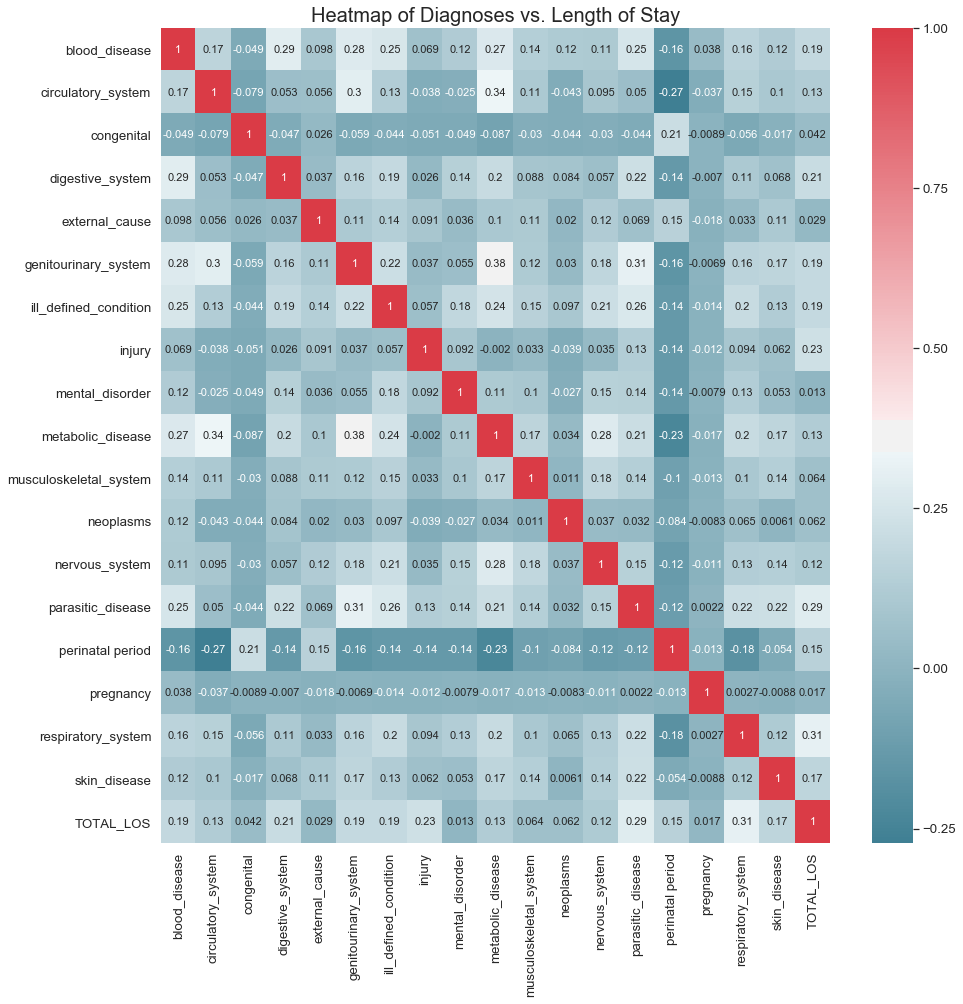

In [16]:
diagnoses = ['blood_disease', 'circulatory_system', 'congenital', 'digestive_system', 'external_cause', 
             'genitourinary_system', 'ill_defined_condition', 'injury', 'mental_disorder', 'metabolic_disease', 
             'musculoskeletal_system', 'neoplasms', 'nervous_system', 'parasitic_disease', 'perinatal period', 
             'pregnancy', 'respiratory_system', 'skin_disease', 'TOTAL_LOS']
corr = data[diagnoses].corr()
plt.figure(figsize = (15,15))
sns.set(font_scale=1.2)
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap=colormap, annot=True, annot_kws={"size": 11})
plt.title('Heatmap of Diagnoses vs. Length of Stay', size=20);

In [45]:
corr.TOTAL_LOS.sort_values().index

'mental_disorder'

In [30]:
diagnoses2 = ['blood disease', 'circulatory system', 'congenital', 'digestive system', 'external cause', 
             'genitourinary system', 'ill defined condition', 'injury', 'mental disorder', 'metabolic disease', 
             'musculoskeletal system', 'neoplasms', 'nervous system', 'parasitic disease', 'perinatal period', 
             'pregnancy', 'respiratory system', 'skin disease']

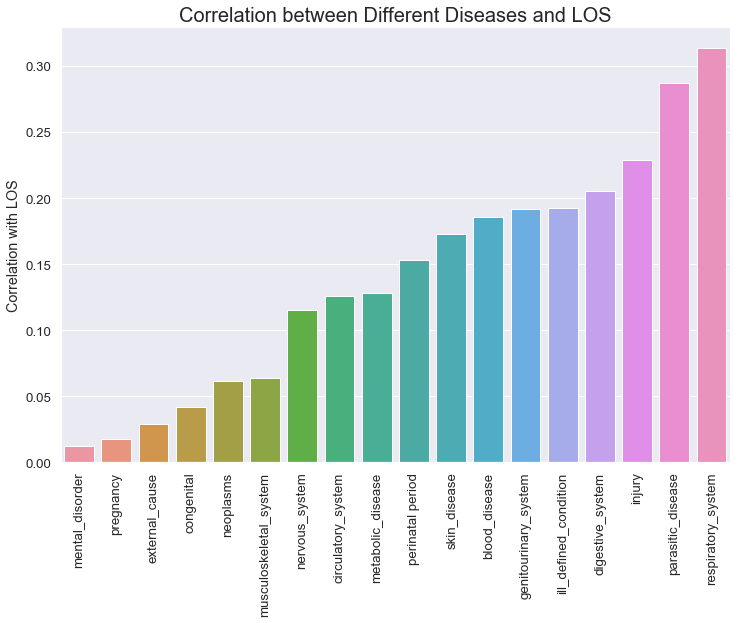

In [46]:
plt.figure(figsize = (12,8))
g = sns.barplot(x = corr.TOTAL_LOS.sort_values().index[:-1], y = corr.TOTAL_LOS.sort_values()[:-1])
g.set_xticklabels(labels = corr.TOTAL_LOS.sort_values().index[:-1], rotation=90)
g.set_title('Correlation between Different Diseases and LOS', size = 20)
g.set(ylabel = 'Correlation with LOS');

## Some Boxplots

In [7]:
def box_count_plot(variable, title_var, fig=(10,8), rot=90):
    fig, axs = plt.subplots(nrows=2, figsize = fig)

    sns.boxplot(
        x=variable,
        y='TOTAL_LOS',
        data=data.sort_values(variable),
        ax=axs[0]
    ).set_title('Boxplot of ' + title_var + ' vs. Length of Stay', size=20)


    sns.countplot(
        x=variable,
        data=data.sort_values(variable),
        ax=axs[1]
    )

    # Draw median price
    axs[0].axhline(
        y=data['TOTAL_LOS'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=rot)
    axs[0].xaxis.set_visible(False)
    
    axs[0].set(ylabel='Length of Stay (Days)')
    axs[1].set(xlabel=title_var, ylabel='Count')

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.05)

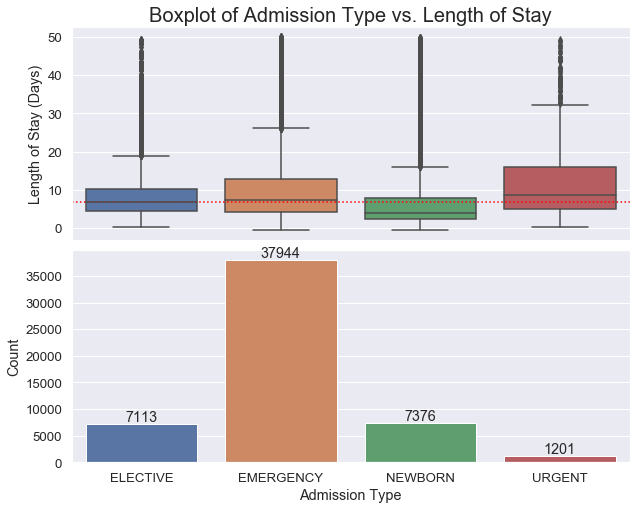

In [8]:
box_count_plot('ADMISSION_TYPE', 'Admission Type', rot=0)

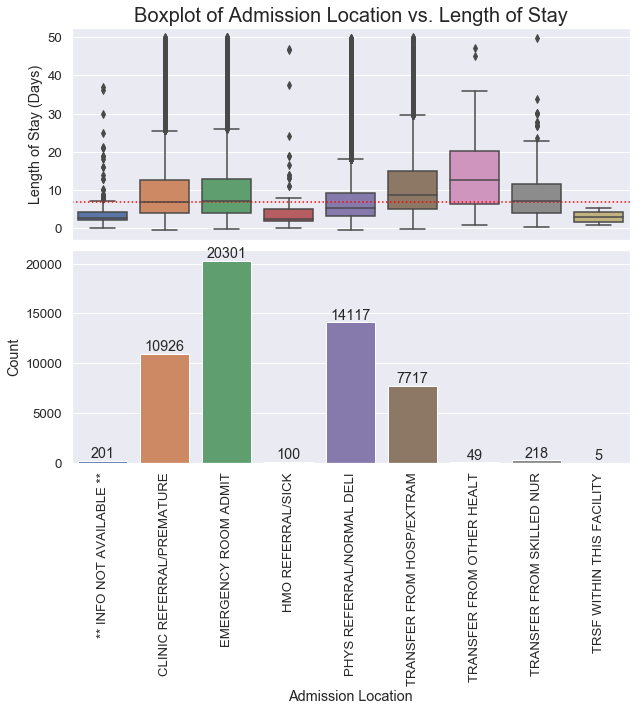

In [9]:
box_count_plot('ADMISSION_LOCATION', 'Admission Location', rot=90)

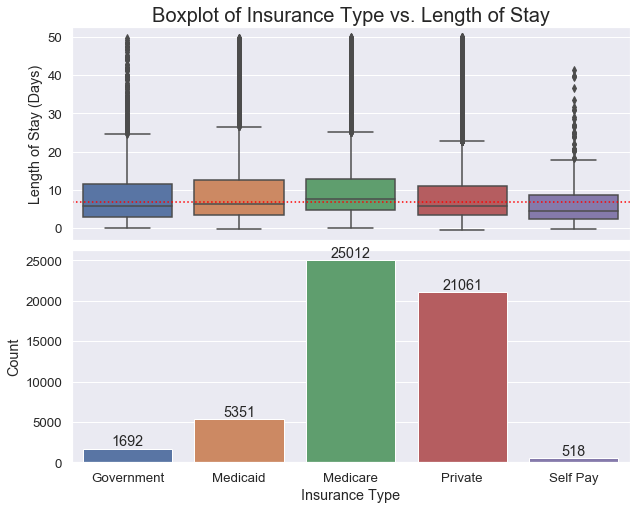

In [10]:
box_count_plot('INSURANCE', 'Insurance Type', rot=0)

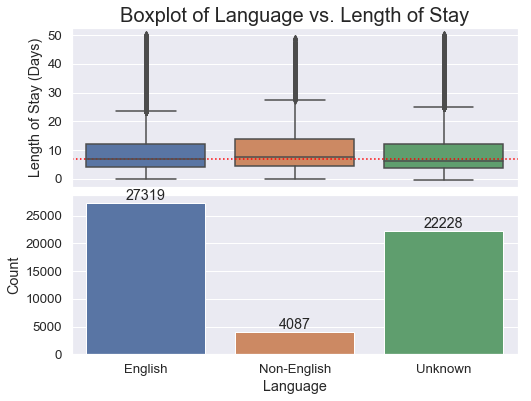

In [11]:
box_count_plot('LANGUAGE', 'Language', fig=(8,6), rot=0)

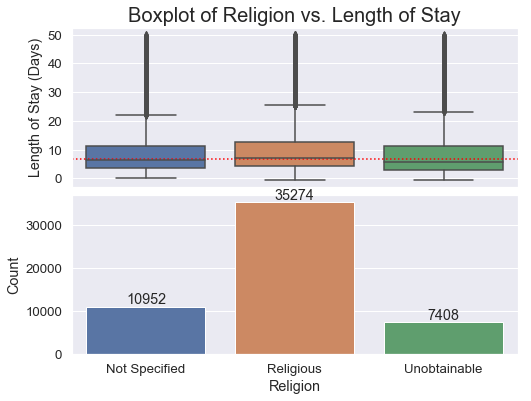

In [12]:
box_count_plot('RELIGION', 'Religion', fig=(8,6), rot=0)

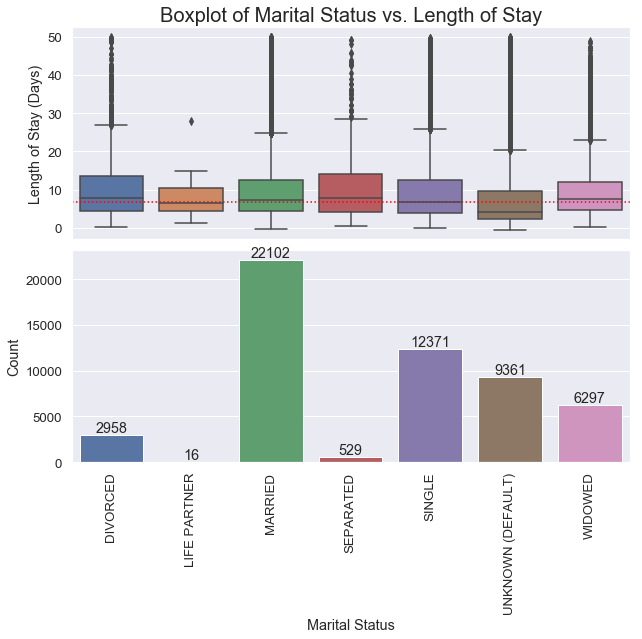

In [13]:
box_count_plot('MARITAL_STATUS', 'Marital Status')

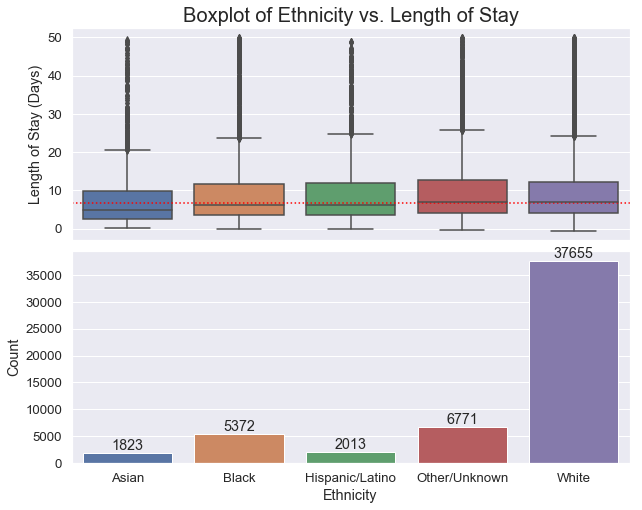

In [14]:
box_count_plot('ETHNICITY', 'Ethnicity', rot=0)

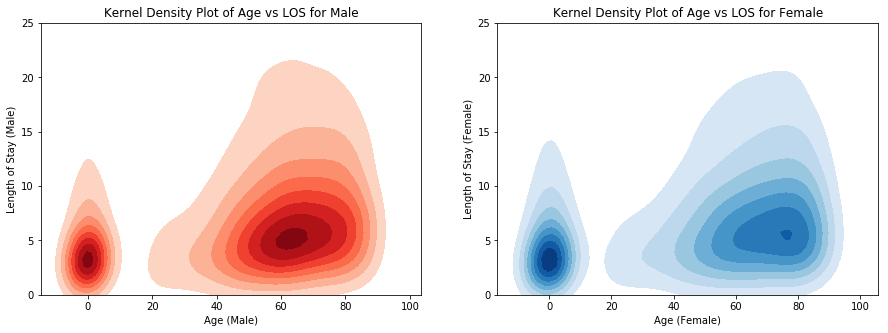

In [15]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))

male_age = data[data['GENDER'] == 'M'].AGE
male_los = data[data['GENDER'] == 'M'].TOTAL_LOS

sns.kdeplot(male_age, male_los, cmap='Reds', shade=True, shade_lowest=False, ax=axs[0])
axs[0].set(xlabel='Age (Male)', ylabel='Length of Stay (Male)', 
           title='Kernel Density Plot of Age vs LOS for Male', ylim=(0,25))

female_age = data[data['GENDER'] == 'F'].AGE
female_los = data[data['GENDER'] == 'F'].TOTAL_LOS
sns.kdeplot(female_age, female_los, cmap='Blues',shade=True, shade_lowest=False, ax=axs[1]);
axs[1].set(xlabel='Age (Female)', ylabel='Length of Stay (Female)', 
           title='Kernel Density Plot of Age vs LOS for Female', ylim=(0,25));

/Users/mike/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


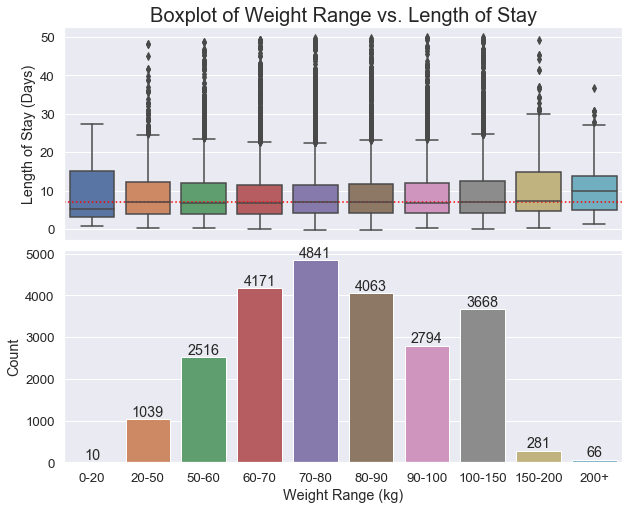

In [16]:
weight_data = data[(data.PATIENTWEIGHT.isnull() == False)]

weight_data['Weight_Range'] = ['0-20' if (w >= 0 and w < 20)
                      else '20-50' if (w >= 20 and w < 50)
                      else '50-60' if (w >= 50 and w < 60)
                      else '60-70' if (w >= 60 and w < 70)
                      else '70-80' if (w >= 70 and w < 80)
                      else '80-90' if (w >= 80 and w < 90)
                      else '90-100' if (w >= 90 and w < 100)
                      else '100-150' if (w >= 100 and w < 150)
                      else '150-200' if (w >= 150 and w < 200)
                      else '200+' for w in weight_data.PATIENTWEIGHT]

fig, axs = plt.subplots(nrows=2, figsize = (10, 8))

sns.boxplot(
    x='Weight_Range',
    y='TOTAL_LOS',
    data=weight_data.sort_values('Weight_Range'),
    ax=axs[0],
    order=['0-20', '20-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-150', '150-200', '200+']
).set_title('Boxplot of Weight Range vs. Length of Stay', size=20)


sns.countplot(
    x='Weight_Range',
    data=weight_data.sort_values('Weight_Range'),
    ax=axs[1],
    order=['0-20', '20-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-150', '150-200', '200+']
)

# Draw median price
axs[0].axhline(
    y=weight_data['TOTAL_LOS'].median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=0)
axs[0].xaxis.set_visible(False)
    
axs[0].set(ylabel='Length of Stay (Days)')
axs[1].set(xlabel='Weight Range (kg)', ylabel='Count')

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.05)

In [47]:
performance = pd.DataFrame()
performance['Out-of-Sample R^2'] = [0.2967733, 0.3051417, 0.5322943, 0.5582751]
performance['Out-of-Sample MAE'] = [5.620560, 5.565300, 4.731331, 4.564514]
performance['Out-of-Sample RMSE'] = [9.291130, 8.932695, 7.577172, 7.363712]
performance.index = ['CART', 'ORT', 'Random Forest', 'Boosting']

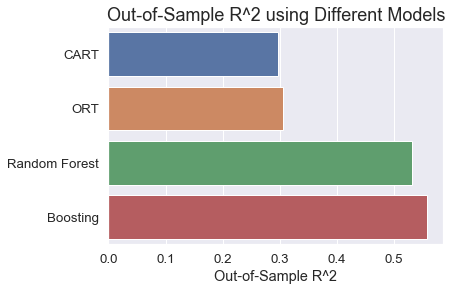

In [70]:
b1 = sns.barplot(performance['Out-of-Sample R^2'], ['CART', 'ORT', 'Random Forest', 'Boosting'])
b1.set_title("Out-of-Sample R^2 using Different Models", size=18);

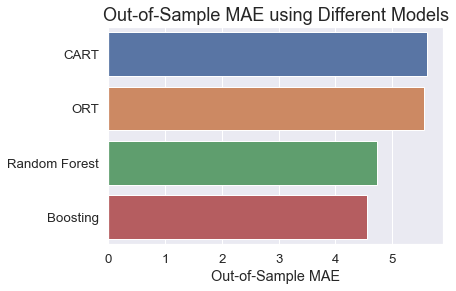

In [71]:
b2 = sns.barplot(performance['Out-of-Sample MAE'], ['CART', 'ORT', 'Random Forest', 'Boosting'])
b2.set_title("Out-of-Sample MAE using Different Models", size=18);

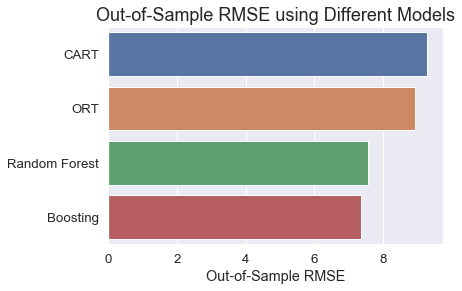

In [72]:
b3 = sns.barplot(performance['Out-of-Sample RMSE'], ['CART', 'ORT', 'Random Forest', 'Boosting'])
b3.set_title("Out-of-Sample RMSE using Different Models", size=18);